In [1]:
import numpy as np
import pandas as pd
import scanpy as sc

In [2]:
adata = sc.read_10x_mtx(
    '../filtered_dataset/tabulamuris/data_10X_P7_4',  # the directory with the `.mtx` file
    var_names='gene_symbols',                # use gene symbols for the variable names (variables-axis index)
    cache=False
)

In [3]:
sc.pp.normalize_per_cell(adata)

# logaritmic transformation ?

In [4]:
sc.pp.scale(adata)

In [7]:
sc.tl.pca(adata, svd_solver='arpack', n_comps=50)
# same number of PCs as seurat

/home/matteo/anaconda3/envs/chl/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


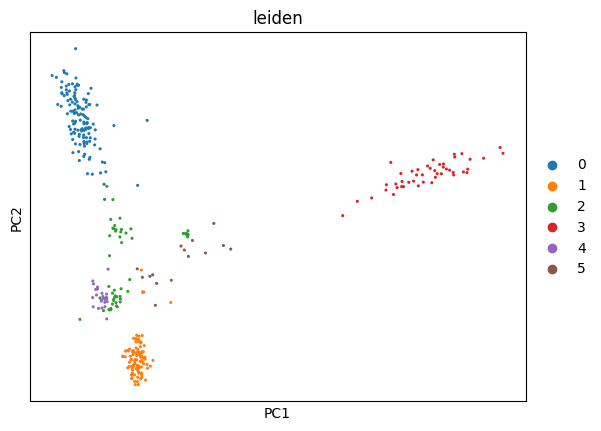

In [8]:
sc.pp.neighbors(adata, n_neighbors=20, n_pcs=10)
# forse n_neighbors è l'equicalente di k.param in seurat

sc.tl.leiden(adata, resolution=0.1)

sc.pl.pca(adata, color=['leiden'], size=20)


# other things

In [39]:
sc.tl.pca(adata, svd_solver='arpack')

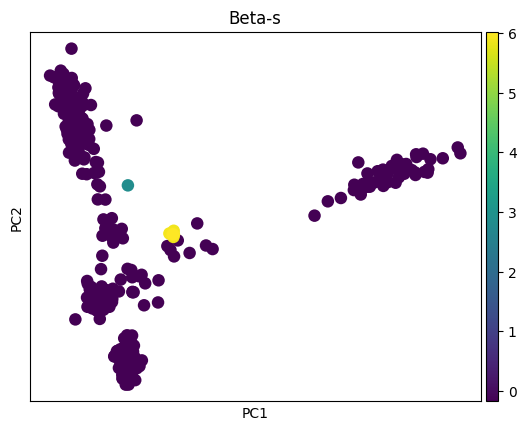

In [40]:
sc.pl.pca(adata, color='Beta-s')

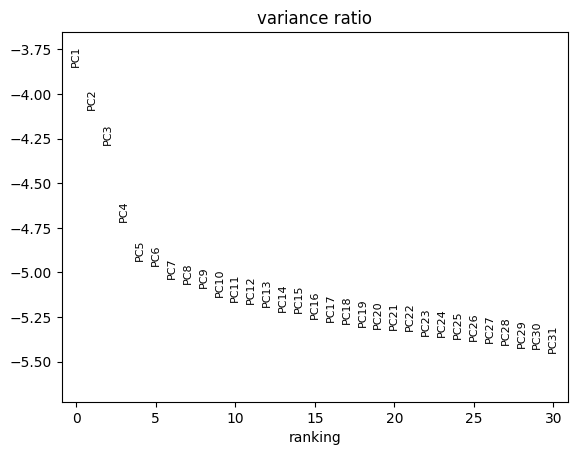

In [41]:
sc.pl.pca_variance_ratio(adata, log=True)

In [42]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)

In [43]:
sc.tl.umap(adata)

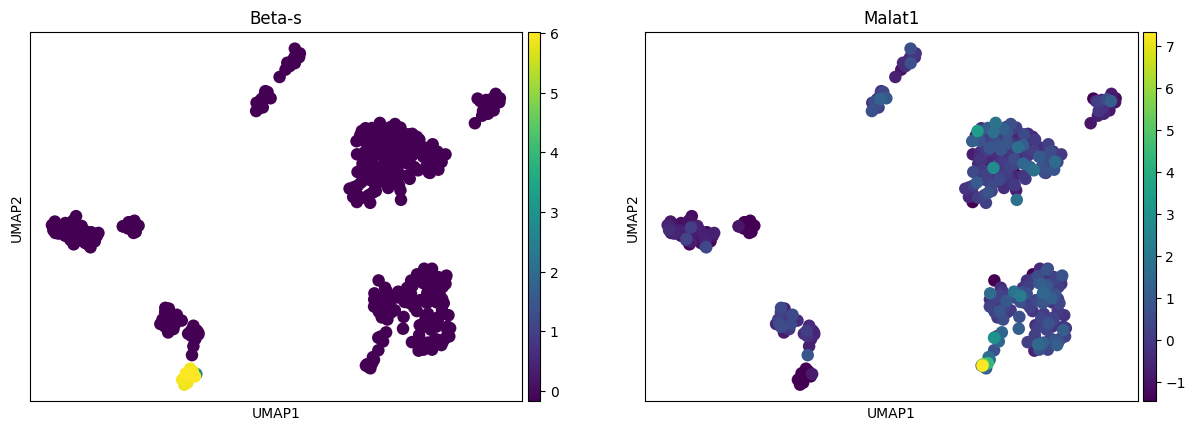

In [44]:
sc.pl.umap(adata, color=['Beta-s', 'Malat1'])

In [45]:
sc.tl.leiden(adata, resolution=0.4)

/home/matteo/anaconda3/envs/chl/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


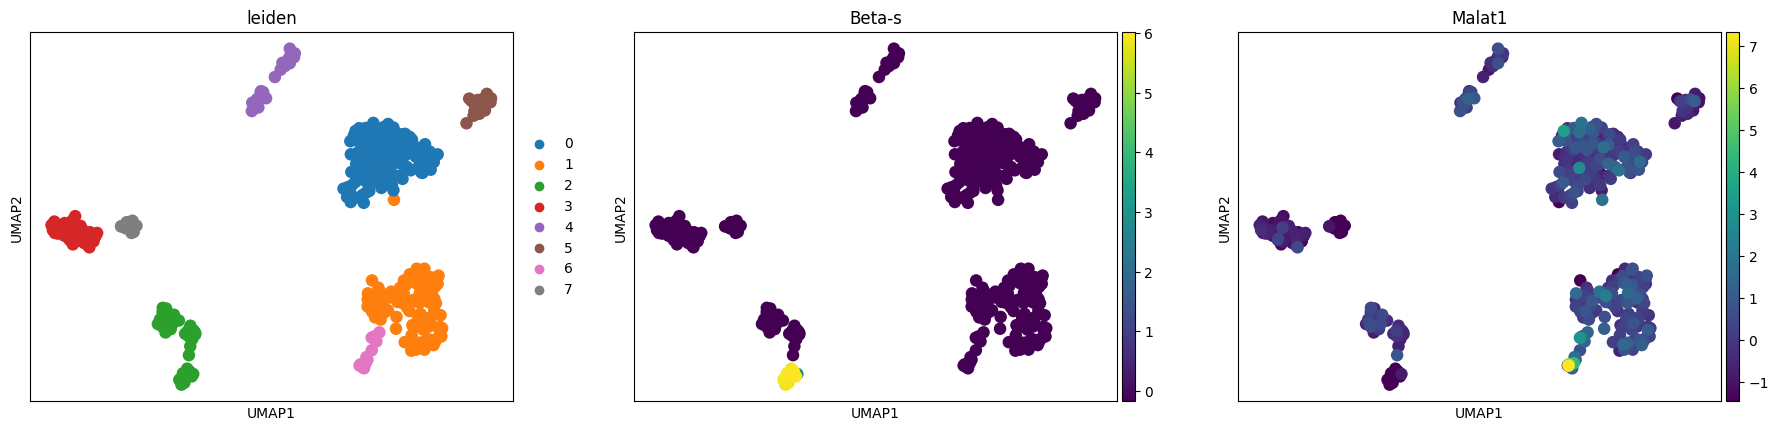

In [46]:
sc.pl.umap(adata, color=['leiden', 'Beta-s', 'Malat1'])

/home/matteo/anaconda3/envs/chl/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/matteo/anaconda3/envs/chl/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/matteo/anaconda3/envs/chl/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/matteo/anaconda3/envs/chl/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/matteo/anaconda3/envs/chl/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'log

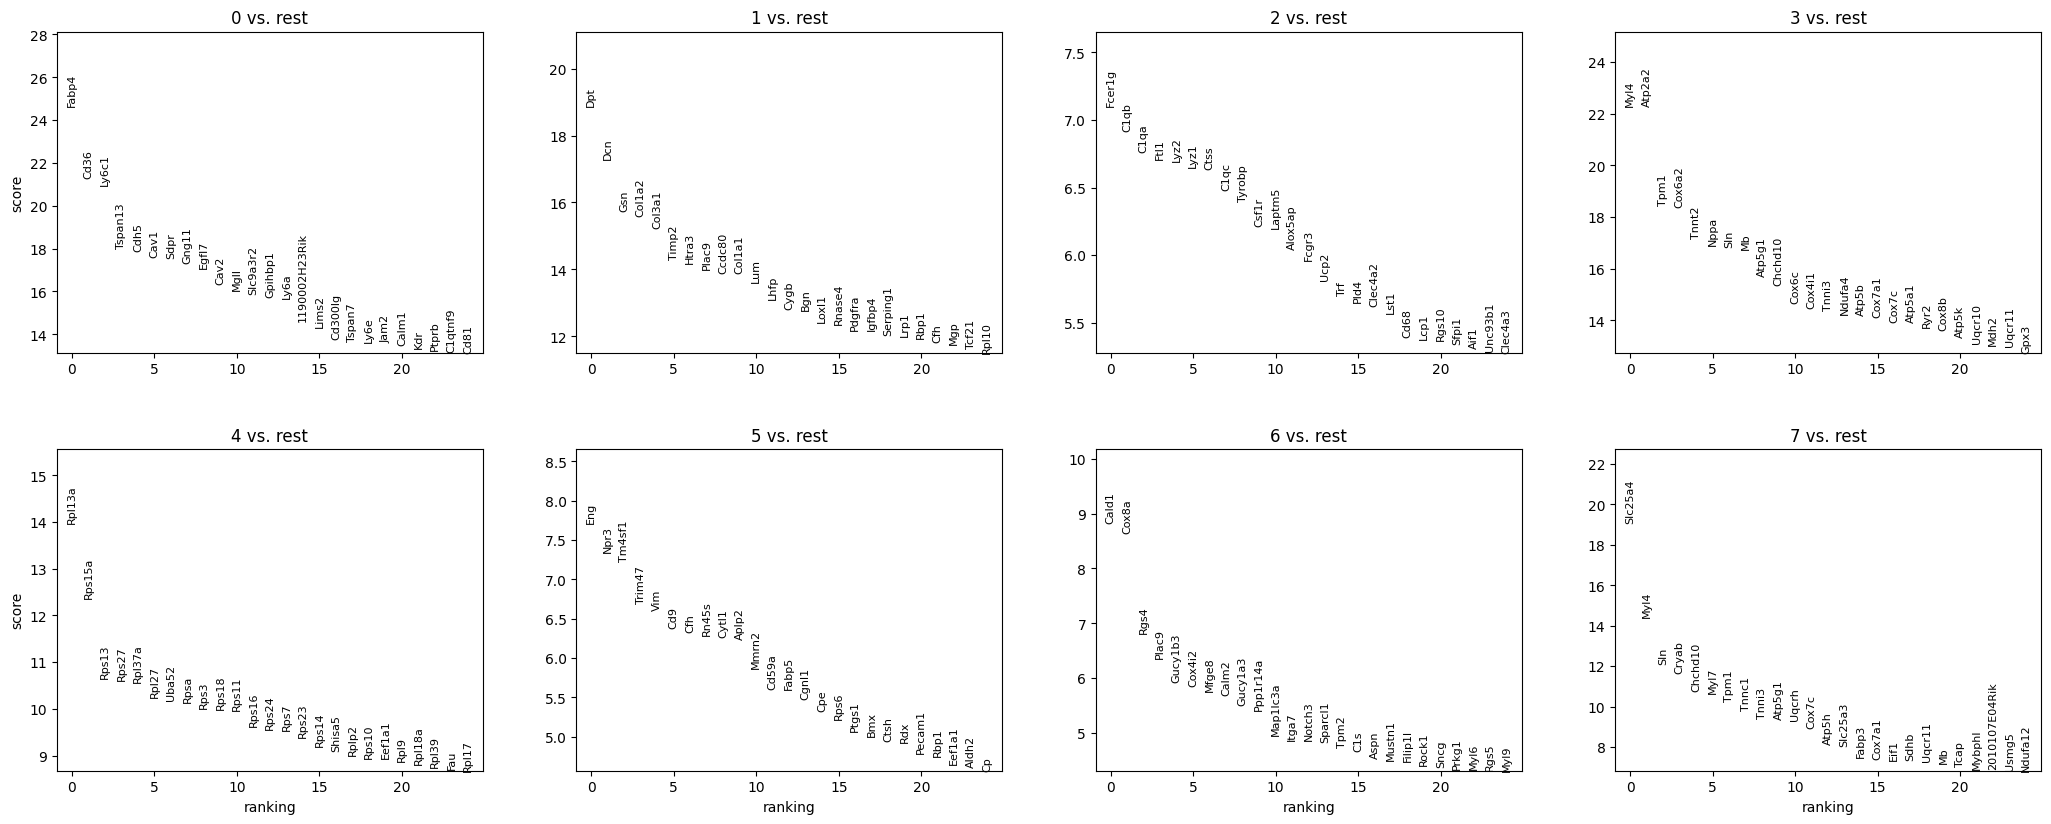

In [47]:
sc.tl.rank_genes_groups(adata, 'leiden', method='t-test')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

In [48]:
sc.tl.rank_genes_groups(adata, 'leiden', method='wilcoxon')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

/home/matteo/anaconda3/envs/chl/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


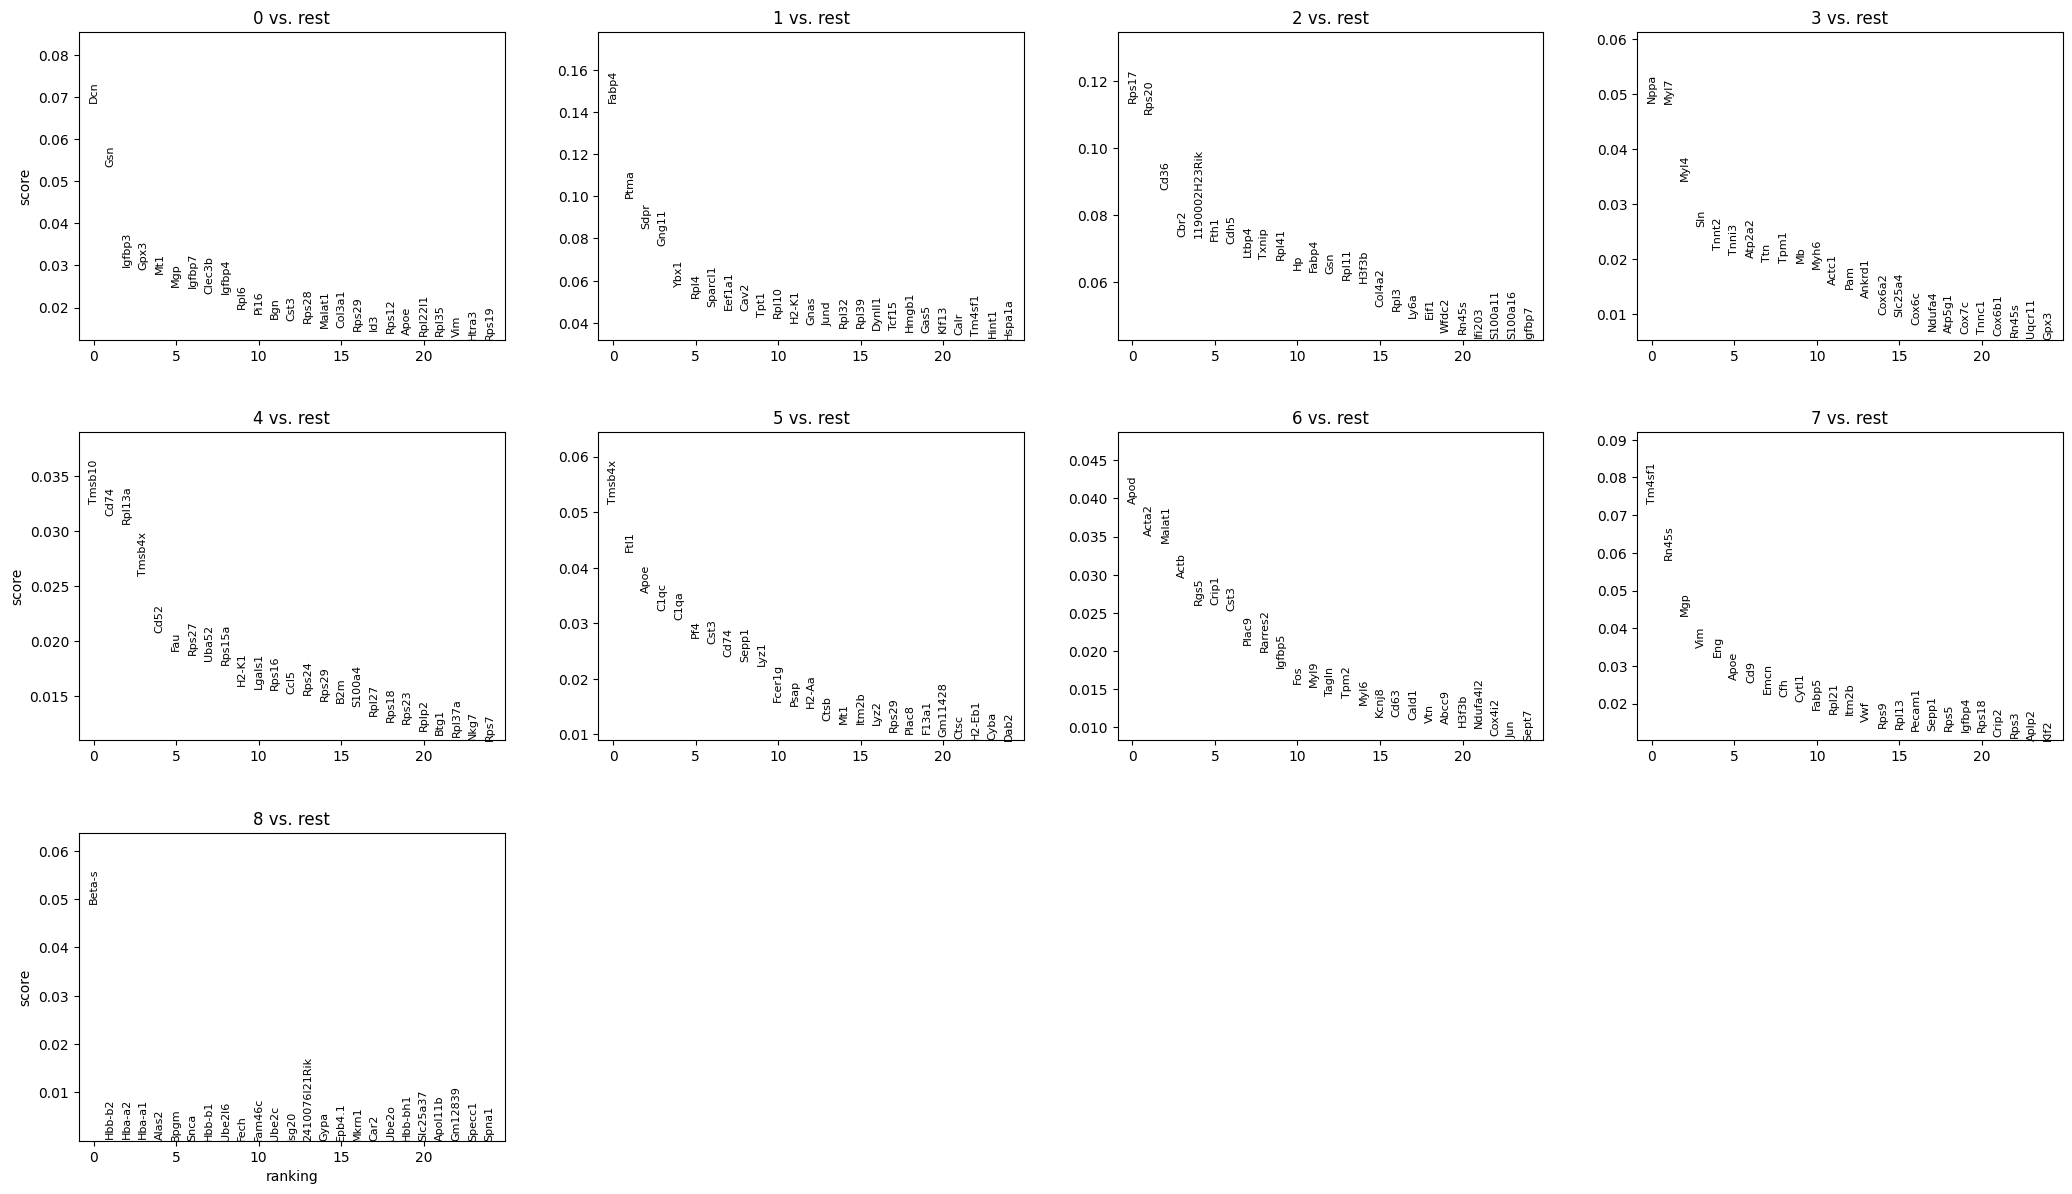

In [ ]:
sc.tl.rank_genes_groups(adata, 'leiden', method='logreg')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)